<a href="https://colab.research.google.com/github/erickvaldezsallagos/EDPII/blob/main/Minimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

**Queremos resolver la ecuacion**\
**$\frac{d^2 u}{d x^2}+u=-x$**\
**sujeto a las condiciones**\
**$u(0)=u(1)=0$**\
Usaremos calculo simbolico y compararamos la solucion analitica con la numerica



**Solucion analitica**

In [2]:
x, a, b= sp.symbols('x a b')
u = sp.Function('u')

In [3]:
ode = u(x).diff(x, x) + u(x) + x
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) - x)

In [4]:
sol = sp.dsolve(ode, ics={u(0): 0, u(1):0})

In [5]:
sol

Eq(u(x), -x + sin(x)/sin(1))

In [6]:
u_expr = sol.rhs # porte derecha (right-hand side) de sol

u_num = sp.lambdify(x, u_expr, "numpy") #Se redefine como arreglo

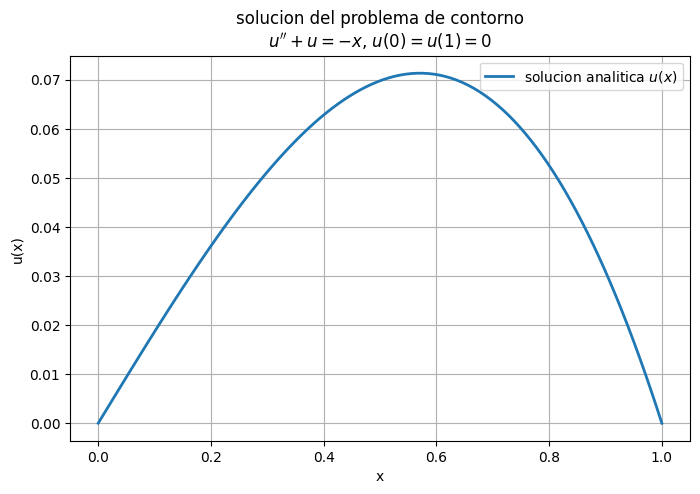

In [8]:
xx = np.linspace(0, 1, 100)
yy = u_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="solucion analitica $u(x)$", linewidth=2)
plt.title("solucion del problema de contorno\n$u'' + u = -x$, $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

**SOLUCION NUMERICA**


Proponemos la funcion de prueba

In [9]:
u_n = a * x * (1 - x) + b * x**2 * (1 - x)

In [10]:
u_n

a*x*(1 - x) + b*x**2*(1 - x)

Y definimos el Error (E):

In [11]:
u_n_2 = sp.diff(u_n, x, 2) #segunda derivada

# E(x)
E = u_n_2 + u_n + x

In [12]:
E

a*x*(1 - x) + b*x**2*(1 - x) + x - 2*(a + 2*b*x + b*(x - 1))

y resolvemos el sistema de ecuaciones resultantes

In [13]:
I = sp.integrate(E**2, (x, 0, 1))
#sp.simplify(I)

In [14]:
I

101*a**2/30 + 101*a*b/30 - 11*a/6 + 131*b**2/35 - 19*b/10 + 1/3

In [15]:
dIa = sp.diff(I, a)
dIb = sp.diff(I, b)

In [16]:
print(dIa, "\n" , dIb)

101*a/15 + 101*b/30 - 11/6 
 101*a/30 + 262*b/35 - 19/10


In [17]:
soleq = sp.solve([dIa, dIb], [a, b],  simplify=True) # para igualar a 0
soleq

{a: 46161/246137, b: 413/2437}

In [18]:
# Sustituir en la funcion de prueba
u_approx = E.subs(soleq)

In [19]:
u_approx

413*x**2*(1 - x)/2437 + 46161*x*(1 - x)/246137 - 41*x/2437 - 8896/246137

In [20]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

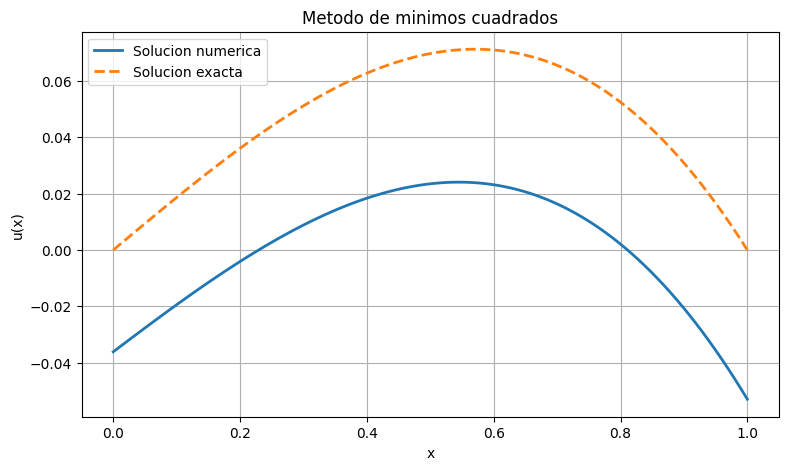

In [21]:
# Solucion analitica y numerica
xx = np.linspace(0, 1, 100)

plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label="Solucion numerica", linewidth=2)
plt.plot(xx, yy, "--", label="Solucion exacta", linewidth=2)

plt.title("Metodo de minimos cuadrados")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()